### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("hotel_booking.csv")

### Exploratory Data Analysis and Data Cleaning

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

As I can see there are some columns which are private information of the customer such as name, email, phone-number, credit card. In this analysis these columns(variable) don't make any impact then I should Drop it.

In [5]:
df.drop(['name' , 'email', 'phone-number' , 'credit_card'] , axis = 1 , inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
#checking null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Here I can see **country** has **488** NULL values for the data of **119390** rows which is **0.4%** of the data that we can deal with but variable(column) **agent** has **16340** which 13% of total entries that is huge so I believe that I have to **Drop agent** and **company** have **112593** Null Values that is **94%** of the data so I have drop this column.

In [8]:
df.drop(['agent', 'company' ],axis = 1 , inplace = True)

In [9]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

Now country have 488 null record by the rule I can replace it by Mode but I believe it is country variable which will matter like I cannot put any country in name as respect to any entry because there may be chances that the cancellation would be happing because of some activities in the country or anything the most wise decision is to drop the rows which have null values

In [11]:
df.dropna(inplace =True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Now there are no Null values so I can proceed for futher exploration

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

Here I observe that reservation_status_date which is date column but pd read it as a object so I have to convert it into datetime

In [14]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'] )

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118898 non-null  object        
 1   is_canceled                     118898 non-null  int64         
 2   lead_time                       118898 non-null  int64         
 3   arrival_date_year               118898 non-null  int64         
 4   arrival_date_month              118898 non-null  object        
 5   arrival_date_week_number        118898 non-null  int64         
 6   arrival_date_day_of_month       118898 non-null  int64         
 7   stays_in_weekend_nights         118898 non-null  int64         
 8   stays_in_week_nights            118898 non-null  int64         
 9   adults                          118898 non-null  int64         
 10  children                        118898 non-null  float64

Now I am done with Null values. Now lets Look into Data

In [16]:
#first catrgorical Date
df.describe(include =  'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


Lets go more deep and look each unique value in Categorical (object) variables

In [17]:
for col in df.describe(include =  'object').columns :
    print(col)
    print(df[col].unique())
    print('-'*50)
    

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [18]:
#now lets look numerical data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


By looking to this I can clearly see some outliers in column babies, adults and much more but I don't really think this field will matter in my analysis so I'll move on But there is one columns in which I am intrested in i.e ADR (avg daily rate) that is the avg rate of hotel(ps- hotel prices changes frequently) which have min value **-6** and that is not possible that somthing have negative price so its also a outliers and also the max value i.e **5400** is also much higher as compared to mode, and other percentiles so it also a outlier but I'll check with a box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1decf0a6d70>,
 'caps': [<matplotlib.lines.Line2D at 0x1decf0a7310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1decf0a6bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1decf0a78b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1decf0a7b80>],
 'means': []}

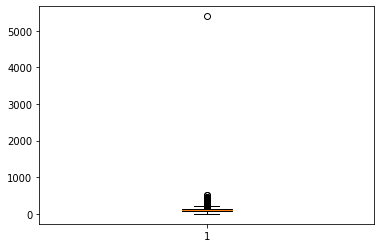

In [19]:
plt.boxplot(df['adr'])

so clearly **5400** is an outlier

In [20]:
df = df[df['adr'] < 5000]

In [21]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


So now the outliers are removed but Its not proper way I guess but I am doing analysis maybe higher the adr the more likely to cancel thats why I am not dealing with outliers that properly but if I was perfoming the EDA for machine Learning I would have properly dealed with the outliers

### Data Analysis and Visualization

First thing first the problem statement was cancellation so I will first look how many bookings are cancelled and how many are not cancelled

In [22]:
cancelled_perc = (df['is_canceled'].value_counts(normalize =True))*100

In [23]:
cancelled_perc

0    62.865337
1    37.134663
Name: is_canceled, dtype: float64

Here I can see that **37%** of total bookings are cancelled

**Lets look by visualization**

<BarContainer object of 2 artists>

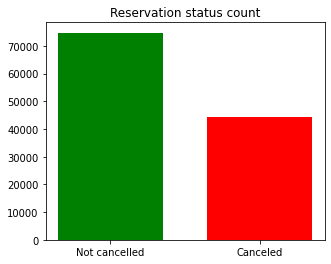

In [24]:
plt.figure(figsize = (5,4))
plt.title('Reservation status count')
plt.bar(['Not cancelled' , 'Canceled'] , df['is_canceled'].value_counts(), color = ['green' ,'red'] , width = 0.7)

Text(0, 0.5, 'number of reservations')

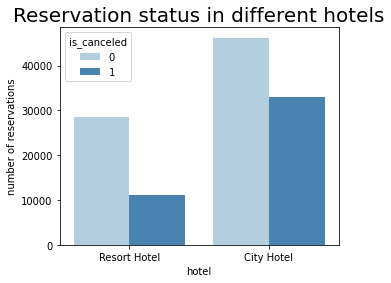

In [25]:
plt.figure(figsize = (5,4))
axl = sns.countplot(x = 'hotel' , hue = 'is_canceled', data = df , palette = 'Blues')
legend_lables,_ = axl.get_legend_handles_labels()
plt.title('Reservation status in different hotels' , size = 20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')

Here I compared the cancellation between City Hotels and Resort , So come to observation that Booking as well as cancellation are higher in city hotel as compared to resort hotels

And also the BOOKING : CANCELLATION Ratio is higher in Ciry hotels as compared to Resort 

In [26]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']

In [27]:
resort_hotel['is_canceled'].value_counts(normalize = True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [28]:
city_hotel = df[df['hotel'] == 'City Hotel']

In [29]:
city_hotel['is_canceled'].value_counts(normalize = True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

This also states the same As I assumed With the help of visualization i.e cancellation in city is much higher than the resort

**41%** of Total Reservation(booking) is getting cancelled in City hotel

**As per hypothesis I will look that does price have impact on cancellation**

In [30]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

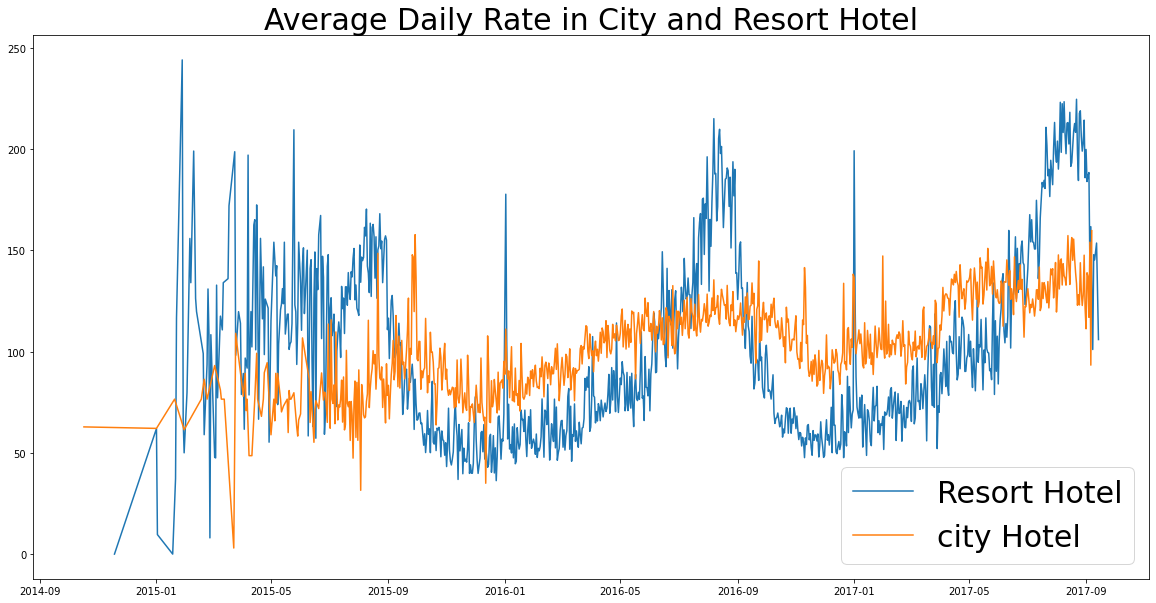

In [31]:
plt.figure(figsize = (20,10))
plt.title('Average Daily Rate in City and Resort Hotel' , fontsize = 30)
plt.plot(resort_hotel.index ,resort_hotel['adr'] , label = 'Resort Hotel')
plt.plot(city_hotel.index ,city_hotel['adr'] , label = 'city Hotel')
plt.legend(fontsize =30)

According to above visualiazation I am getting information that price(adr) of city hotel is less than resort hotel for maximum of period but between **09-2015 to 05-2016** City Hotel have higher ADR but I can clearly observe Resort hotels have a sudden spikes in ADR that will be because of Hoildays

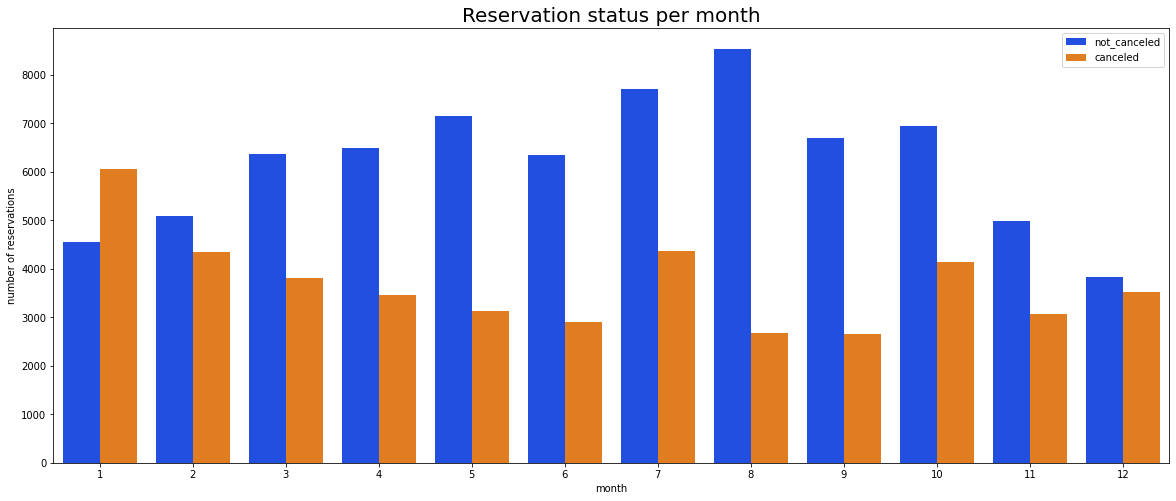

In [32]:
df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (20,8))
axl = sns.countplot(x= 'month' , hue = 'is_canceled',data =df , palette = 'bright')
legend_lables,_ = axl.get_legend_handles_labels()
plt.title("Reservation status per month" , size = 20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not_canceled' , 'canceled'])




Here I can clearly see 5,7,8 Month i.e **May , Jully , Auguest** have the highest booking and as well as they are not cancelled but in **January** booking cancellation is highest. Also **Auguest** Have **Highest Booking(Reservations)** and the other hand **January ,  December** have the **Lowest Reservations**

Here a very intersting insight or point to look                              
**When Reservations are Higher Cancellation is Lower**  
**When Reservations are Lower Cancellation is Higher** 

<AxesSubplot:title={'center':'ADR per month'}, xlabel='month', ylabel='adr'>

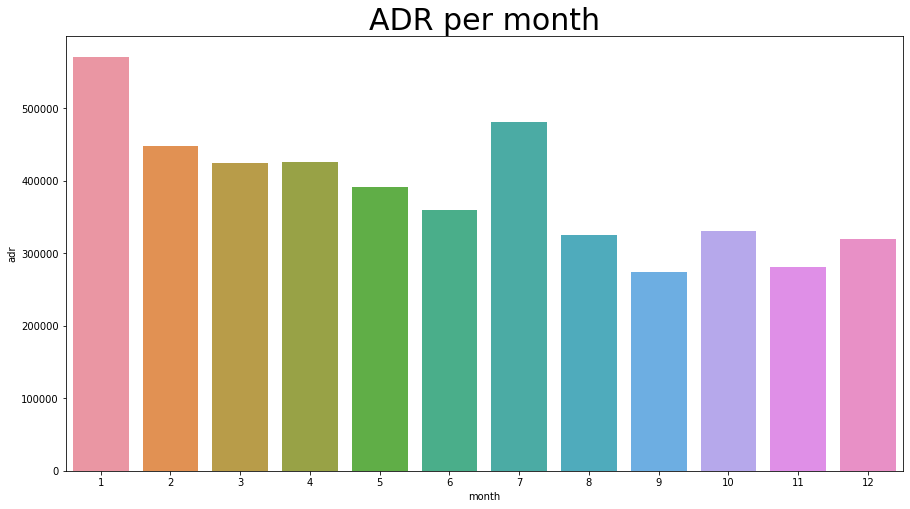

In [33]:
plt.figure(figsize = (15,8))
plt.title('ADR per month' , fontsize = 30)
sns.barplot('month' , 'adr' , data = df[df['is_canceled'] == 1].groupby('month')[['adr']].sum().reset_index())



Here is culprit in **August** Have low **ADR** thats why the cancellations are less but in **January** have the highest **ADR** that why the cancellation are higher

Here my I failed to reject the alternate hypothesis so I conculde that                              **Higher the price higher the cancellations**

#### Lets look how we can solve this lets look which countries have higher cancellation 

In [34]:
#there are 177 countries in this data but my priorty will be for top 10
cancelled_data = df[df['is_canceled'] == 1]
top_10_country  = cancelled_data['country'].value_counts()[:10]


([<matplotlib.patches.Wedge at 0x1ded4e4aa10>,
 [Text(-0.6485414980270044, 0.888478432679651, 'PRT'),
  Text(-0.12452901505974424, -1.0929284168728757, 'GBR'),
  Text(0.2795827699816853, -1.0638766257087182, 'ESP'),
  Text(0.6082427774650023, -0.9165373553007318, 'FRA'),
  Text(0.8244337697170071, -0.7282231521657391, 'ITA'),
  Text(0.9549224064682716, -0.5460065911917595, 'DEU'),
  Text(1.0312598327523899, -0.38275730868464564, 'IRL'),
  Text(1.0729025706347506, -0.24265216653750293, 'BRA'),
  Text(1.0926161903610716, -0.12723938290033737, 'USA'),
  Text(1.0992090719340442, -0.041706308610296686, 'BEL')],
 [Text(-0.35374990801472966, 0.48462459964344595, '70.07'),
  Text(-0.06792491730531504, -0.5961427728397503, '6.25'),
  Text(0.1524996927172829, -0.5802963412956644, '5.54'),
  Text(0.331768787708183, -0.49992946652767184, '4.93'),
  Text(0.44969114711836744, -0.39721262845403943, '3.39'),
  Text(0.5208667671645117, -0.297821777013687, '3.10'),
  Text(0.5625053633194853, -0.20877671

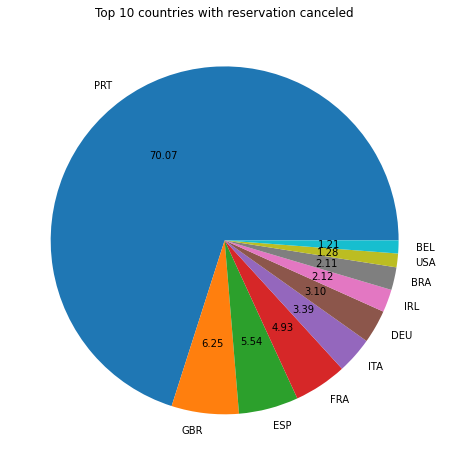

In [35]:
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country , autopct = '%.2f' , labels = top_10_country.index)


**Portugal** have the highest cancellation with **70.07%** of cancellations **United Kingdom** have **6.25%** of cancellations

In [36]:
bookings = df['market_segment'].value_counts()

([<matplotlib.patches.Wedge at 0x1ded4dc9cf0>,
 [Text(0.08845121627874356, 1.0964380430917249, 'Online TA'),
  Text(-0.9770348354386641, -0.5053740499267277, 'Offline TA/TO'),
  Text(0.07500231561547695, -1.0974400451288064, 'Groups'),
  Text(0.8754803024379991, -0.665983663495637, 'Direct'),
  Text(1.0809536706007379, -0.20381158459418294, 'Corporate'),
  Text(1.0994397026643055, -0.03510470346582828, 'Complementary'),
  Text(1.099978431466223, -0.006888418476511504, 'Aviation')],
 [Text(0.048246117970223754, 0.598057114413668, '47.44'),
  Text(-0.5329280920574531, -0.275658572687306, '20.32'),
  Text(0.04091035397207833, -0.5986036609793489, '16.66'),
  Text(0.47753471042072676, -0.3632638164521656, '10.47'),
  Text(0.5896110930549479, -0.11116995523319069, '4.30'),
  Text(0.5996943832714393, -0.019148020072269966, '0.62'),
  Text(0.5999882353452125, -0.0037573191690062745, '0.20')])

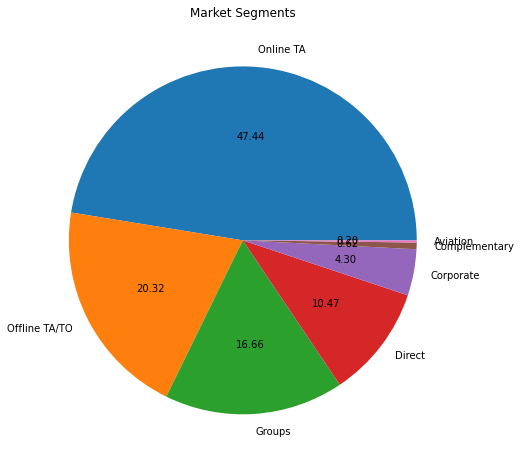

In [37]:
plt.figure(figsize = (8,8))
plt.title('Market Segments')
plt.pie(bookings , autopct = '%.2f' , labels = bookings.index)

Here I can observe **47.44%** of Reservations are happening from **Online Travelling Agents** and **20.32%** from **Offline Travelling Agents & Tour Operations**

Here I accept failed to accept null hypothesis                
**Conclusion** Most of the bookings are done by **Online Travelling Agents**

In [38]:
cancel_seg = cancelled_data['market_segment'].value_counts()

([<matplotlib.patches.Wedge at 0x1ded09d76d0>,
 [Text(0.10456636680246842, 1.0950186641942374, 'Online TA'),
  Text(-0.8619700891034302, -0.6833795179042351, 'Groups'),
  Text(0.5742411648402304, -0.9382148392574782, 'Offline TA/TO'),
  Text(1.0521617769338438, -0.320866943076747, 'Direct'),
  Text(1.09556811466934, -0.09864332780207867, 'Corporate'),
  Text(1.0998952007360272, -0.01518378733565183, 'Complementary'),
  Text(1.0999924704700055, -0.00407000114182271, 'Aviation')],
 [Text(0.05703620007407367, 0.5972829077423112, '46.97'),
  Text(-0.4701655031473255, -0.3727524643114009, '27.40'),
  Text(0.3132224535492165, -0.5117535486858971, '18.75'),
  Text(0.5739064237820966, -0.17501833258731656, '4.35'),
  Text(0.597582608001458, -0.05380545152840654, '2.22'),
  Text(0.5999428367651057, -0.008282065819446452, '0.20'),
  Text(0.5999958929836392, -0.002220000622812387, '0.12')])

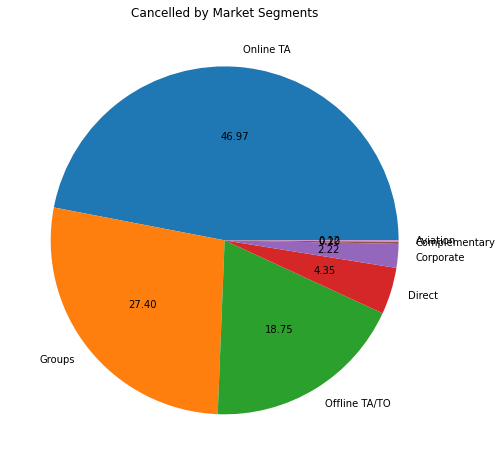

In [39]:
plt.figure(figsize = (8,8))
plt.title('Cancelled by Market Segments')
plt.pie(cancel_seg , autopct = '%.2f' , labels = cancel_seg.index)

As Expected Most of the cancellation are happening in booking(reservations) by **Online Travelling Agent -  46.97%** and then from **Groups - 27.40**

**98 - 99 %** of resevations from the online travelling are cancelled

There may be a chance that the information provided by the online agents are not true of updated thats why there are more cancellations 